Introduction:

Predict (x,y) coordinate of bright pixel in 50×50 grayscale image using deep learning.

In [48]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Dataset Generation


Since real data was unavailable, a synthetic dataset was generated where each image contains one pixel with intensity 255 while others are zero. Random pixel selection ensures unbiased spatial distribution and sufficient samples help the model generalize well.

Generate a dataset where :
- Each image is 50 X 50 grayscale
- Excatly one pixel = 255
- Target label is (x,y) coordinate

In [16]:
def dataset(samples=15000,img_size=50):
  images=[]
  labels=[]
  for _ in range(samples):
    img=np.zeros((img_size,img_size),dtype=np.float32)
    x=np.random.randint(0,img_size)
    y=np.random.randint(0,img_size)
    img[x,y]=255
    images.append(img)
    labels.append([x,y])

  return np.array(images),np.array(labels)

In [17]:
images,labels=dataset()

In [18]:
images.shape,labels.shape

((15000, 50, 50), (15000, 2))

Text(0, 0.5, '10')

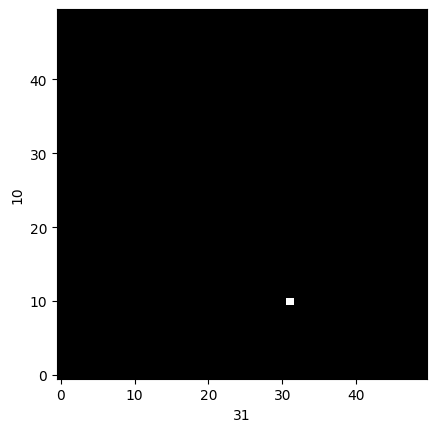

In [36]:
plt.imshow(images[0],cmap='gray',origin='lower')
plt.xlabel(labels[0][1])
plt.ylabel(labels[0][0])


2. Preprocessing

In [37]:
# normalize images
images=images/255

In [20]:
images=np.expand_dims(images,axis=-1)

In [21]:
images.shape

(15000, 50, 50, 1)

In [38]:
# Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,
                                               test_size=0.3,random_state=1234)
x_val,x_temp,y_val,y_temp=train_test_split(x_test,y_test,
                                           test_size=0.5,random_state=1234)

In [47]:
print('Train:',x_train.shape)
print('validation',x_val.shape)
print('Test',x_test.shape)

Train: (10500, 50, 50, 1)
validation (2250, 50, 50, 1)
Test (4500, 50, 50, 1)


3. Model Building (CNN)

In [49]:
model=models.Sequential()

model.add(layers.Conv2D(16,(3,3),activation='relu',input_shape=(50,50,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,802 (987.51 KB)

 Trainable params: 252,802 (987.51 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

4. Training

In [53]:
histroy=model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=20,
    batch_size=64
)

Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - loss: 393.8252 - mae: 15.8577 - val_loss: 47.9017 - val_mae: 4.6140
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 108ms/step - loss: 38.4254 - mae: 3.9182 - val_loss: 22.2131 - val_mae: 3.0924
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - loss: 19.4842 - mae: 2.8974 - val_loss: 13.2850 - val_mae: 2.4684
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 99ms/step - loss: 13.1998 - mae: 2.5324 - val_loss: 9.6669 - val_mae: 2.1509
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 102ms/step - loss: 9.2207 - mae: 2.0918 - val_loss: 7.5194 - val_mae: 1.9201
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 99ms/step - loss: 6.2911 - mae: 1.7439 - val_loss: 5.5981 - val_mae: 1.6378
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - loss: 4.5894 - mae: 1.4517 - val_loss: 3.7146 - val_mae: 1.2598
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - loss: 3.0290 - mae: 1.1178 - val_loss: 2.3892 - val_mae: 0.9354
Epoch 9/20
165/165 ━━━━━━━

5. Training Graphs

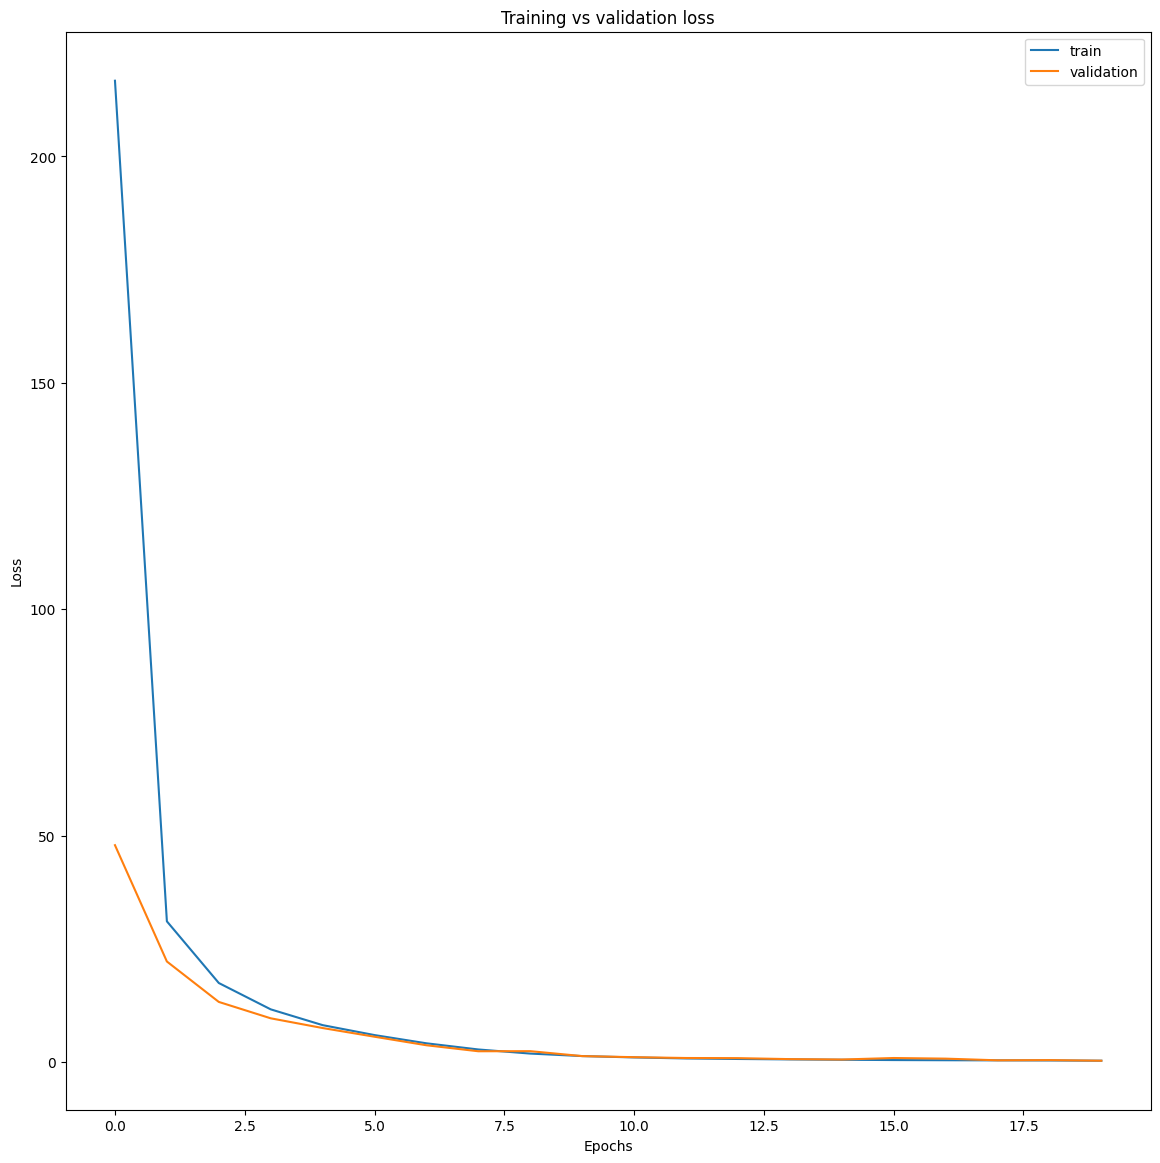

In [56]:
plt.figure(figsize=(14,14))
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs validation loss')
plt.legend(['train','validation'])
plt.show()

6. Evaluation

In [57]:
test_loss,test_mae=model.evaluate(x_temp,y_temp)
print('Test Loss',test_loss)
print('Test MAE',test_mae)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.2491 - mae: 0.3711
Test Loss 0.26239150762557983
Test MAE 0.3676603138446808


7. Prediction Visualization

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


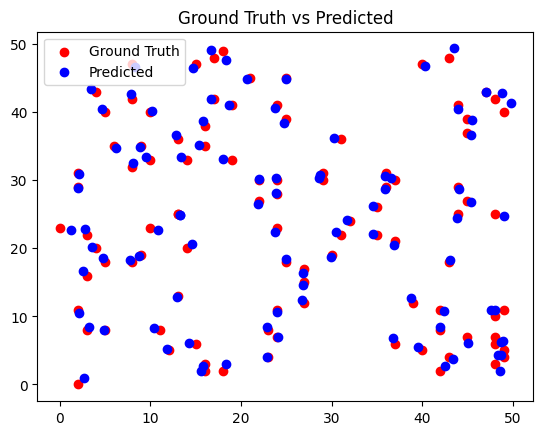

In [65]:
predictions=model.predict(x_temp[:100])
plt.scatter(y_temp[:100,0],y_temp[:100,1],color='red')
plt.scatter(predictions[:,0],predictions[:,1],color='blue')
plt.legend(['Ground Truth','Predicted'])
plt.title('Ground Truth vs Predicted')
plt.show()

8. Sample Image Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


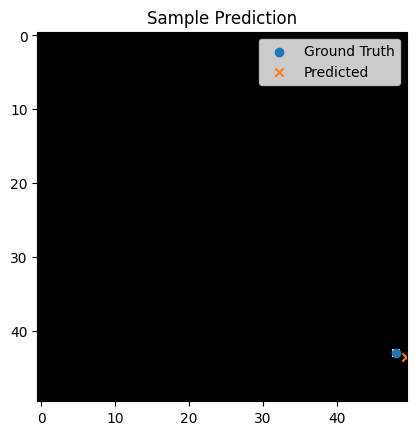

True coordinate [43 48]
Predicted coordinate [43.55321 49.3492 ]


In [72]:
sample_img= x_temp[0]
true_cord=y_temp[0]
pred_cord=model.predict(np.expand_dims(sample_img,axis=0))[0]

plt.imshow(sample_img.squeeze(),cmap='gray')
plt.scatter(true_cord[1],true_cord[0],marker='o',label='Ground Truth')
plt.scatter(pred_cord[1],pred_cord[0],marker='x',label='Predicted')
plt.title('Sample Prediction')
plt.legend()
plt.show()

print('True coordinate',true_cord)
print('Predicted coordinate',pred_cord)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


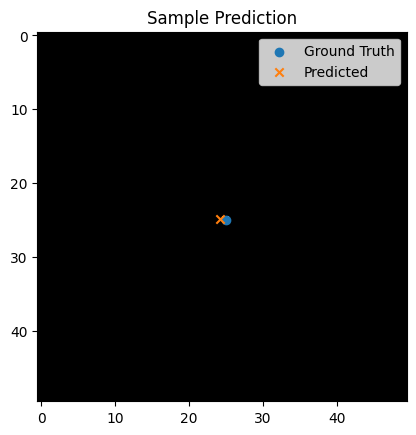

True coordinate [25, 25]
Predicted coordinate [24.890095 24.237589]


In [87]:
exm = np.zeros((50,50), dtype=np.float32)
exm[25,25] = 255
true_cord = [25,25]
exm = exm / 255.0

exm = np.expand_dims(exm, axis=-1)
exm = np.expand_dims(exm, axis=0)

pred_cord = model.predict(exm)[0]

plt.imshow(exm.squeeze(), cmap='gray')
plt.scatter(true_cord[1], true_cord[0], marker='o', label='Ground Truth')
plt.scatter(pred_cord[1], pred_cord[0], marker='x', label='Predicted')
plt.title('Sample Prediction')
plt.legend()
plt.show()

print('True coordinate',true_cord)
print('Predicted coordinate',pred_cord)

Dependencies:
- numpy
- tensorflow
- matplotlib
- scikit-learn
